<a href="https://colab.research.google.com/github/AmirSaba/Score_attribution-for-visa-premier/blob/main/VisaPremier_Pret_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ETUDE DE CAS (carte VISA premier)
### Prétraitement 5

## Objectif:

L’objectif de ce travail est la mise en pratique concrète d’un certain nombre de techniques d’apprentissage supervisé (Bayesien Naïf, KNN, LDA, QDA, Linear SVM, Non Linear SVM, Régression logistique, CART et Random Forest), à travers l’étude de données synthétiques et deux cas pratiques.

## Données:

Il s’agit d’une base de données décrivant les clients d’une banque et leurs comportements (mouvements, soldes des différents comptes). La variable à expliquer Y est la variable binaire « Possession de la carte Visa Premier ».
Le dictionnaire des variables de la table Visa sera présenté dessous.

## Importer les librairies:

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import plotly.express as px
import scipy.stats
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
from sklearn import svm
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn import preprocessing
plt.style.use('ggplot')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

## Charger le tableau sous format DataFrame:

In [ ]:
VisaPremier = pd.read_table(r'.\VisaPremier.txt')

In [ ]:
VisaPremier.shape

(1073, 48)

In [ ]:
VisaPremier

,matricul,departem,ptvente,sexe,age,sitfamil,anciente,csp,codeqlt,nbimpaye,...,mtbon,nbpaiecb,nbcb,nbcbptar,avtscpte,aveparfi,cartevp,sexer,cartevpr,nbjdebit
0,148009,31,1,Shom,51,Fmar,238,Pcad,A,0,...,0,14,2,0,1303700,556967,Coui,0,1,1
1,442153,82,6,Shom,52,Fmar,270,Pcad,A,0,...,19500000,5,2,0,19856243,133896,Coui,0,1,0
2,552427,97,1,Shom,58,Fmar,139,Pcad,C,0,...,0,0,1,0,122745,0,Coui,0,1,0
3,556005,40,1,Shom,27,Fcel,99,Psan,B,0,...,0,14,2,0,83224,0,Coui,0,1,0
4,556686,65,1,Shom,49,Fsep,89,Pemp,A,0,...,0,11,3,1,494773,21423,Coui,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,7567726,31,1,Sfem,38,Fmar,23,Psan,.,0,...,0,.,0,0,0,0,Cnon,1,0,0
1069,7572458,31,1,Sfem,43,Fmar,27,Pcad,.,0,...,0,.,0,0,10685,0,Cnon,1,0,0
1070,7574479,32,1,Sfem,49,Fmar,31,Pemp,B,0,...,0,9,1,0,63336,0,Cnon,1,0,9
1071,7580358,65,3,Sfem,27,F.,192,Psan,D,0,...,0,2,1,0,27897,0,Cnon,1,0,38


In [ ]:
VisaPremier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matricul  1073 non-null   int64 
 1   departem  1073 non-null   object
 2   ptvente   1073 non-null   int64 
 3   sexe      1073 non-null   object
 4   age       1073 non-null   int64 
 5   sitfamil  1073 non-null   object
 6   anciente  1073 non-null   int64 
 7   csp       1073 non-null   object
 8   codeqlt   1073 non-null   object
 9   nbimpaye  1073 non-null   int64 
 10  mtrejet   1073 non-null   int64 
 11  nbopguic  1073 non-null   int64 
 12  moycred3  1073 non-null   int64 
 13  aveparmo  1073 non-null   int64 
 14  endette   1073 non-null   int64 
 15  engagemt  1073 non-null   int64 
 16  engagemc  1073 non-null   int64 
 17  engagemm  1073 non-null   int64 
 18  nbcptvue  1073 non-null   int64 
 19  moysold3  1073 non-null   int64 
 20  moycredi  1073 non-null   int64 
 21  agemvt    1073

In [ ]:
VisaPremier.describe()

,matricul,ptvente,age,anciente,nbimpaye,mtrejet,nbopguic,moycred3,aveparmo,endette,...,mteparte,nbbon,mtbon,nbcb,nbcbptar,avtscpte,aveparfi,sexer,cartevpr,nbjdebit
count,1.073000e+03,1073.00000,1073.000000,1073.000000,1073.0,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,...,1073.000000,1073.000000,1.073000e+03,1073.000000,1073.000000,1.073000e+03,1.073000e+03,1073.000000,1073.000000,1073.000000
mean,2.489307e+06,1.66356,42.532153,157.117428,0.0,-0.072693,1.505126,47.626281,57249.062442,5.456664,...,19.710158,0.000932,1.817335e+04,1.069897,0.136067,1.468193e+05,5.072736e+04,0.377446,0.334576,12.084809
std,1.925341e+06,1.08567,11.905142,156.065121,0.0,1.578875,2.797290,602.687390,116286.219326,12.329669,...,645.639327,0.030528,5.952984e+05,0.868047,0.379186,7.377687e+05,3.399783e+05,0.484974,0.472062,23.335589
min,1.133330e+05,1.00000,18.000000,1.000000,0.0,-51.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,8.604360e+05,1.00000,33.000000,45.000000,0.0,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.184000e+03,0.000000e+00,0.000000,0.000000,0.000000
50%,1.948586e+06,1.00000,43.000000,136.000000,0.0,0.000000,1.000000,12.000000,6017.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,0.000000,2.399300e+04,0.000000e+00,0.000000,0.000000,0.000000
75%,3.901594e+06,2.00000,52.000000,216.000000,0.0,0.000000,2.000000,27.000000,57818.000000,6.000000,...,0.000000,0.000000,0.000000e+00,2.000000,0.000000,1.148070e+05,5.000000e+02,1.000000,1.000000,10.000000
max,7.589439e+06,7.00000,65.000000,870.000000,0.0,0.000000,28.000000,19579.000000,970000.000000,99.000000,...,21149.000000,1.000000,1.950000e+07,5.000000,4.000000,1.985624e+07,7.066619e+06,1.000000,1.000000,134.000000


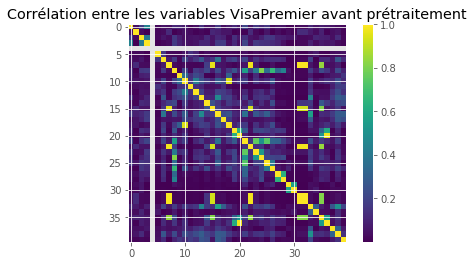

In [ ]:
corr= np.abs(VisaPremier.corr())
plt.imshow(corr)
plt.title('Corrélation entre les variables VisaPremier avant prétraitement')
plt.colorbar()
plt.show()

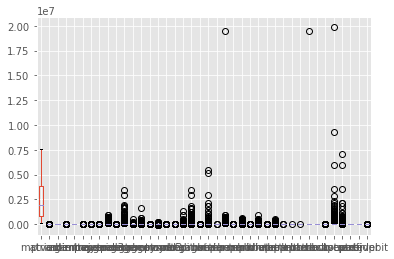

In [ ]:
VisaPremier.boxplot()

In [ ]:
VisaPremier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matricul  1073 non-null   int64 
 1   departem  1073 non-null   object
 2   ptvente   1073 non-null   int64 
 3   sexe      1073 non-null   object
 4   age       1073 non-null   int64 
 5   sitfamil  1073 non-null   object
 6   anciente  1073 non-null   int64 
 7   csp       1073 non-null   object
 8   codeqlt   1073 non-null   object
 9   nbimpaye  1073 non-null   int64 
 10  mtrejet   1073 non-null   int64 
 11  nbopguic  1073 non-null   int64 
 12  moycred3  1073 non-null   int64 
 13  aveparmo  1073 non-null   int64 
 14  endette   1073 non-null   int64 
 15  engagemt  1073 non-null   int64 
 16  engagemc  1073 non-null   int64 
 17  engagemm  1073 non-null   int64 
 18  nbcptvue  1073 non-null   int64 
 19  moysold3  1073 non-null   int64 
 20  moycredi  1073 non-null   int64 
 21  agemvt    1073

## PRETRAITEMENT



In [ ]:
VisaPremier = VisaPremier.replace('.',np.NaN)

In [ ]:
VisaPremier = VisaPremier.replace('F.',np.NaN)

In [ ]:
VisaPremier.dropna(subset=[n for n in VisaPremier if n!= 'nbpaiecb'], inplace=True) #codeqlt,sitfamil,agemvt,departem

In [ ]:
#Remove blank and duplicated columns 
cols_remove = ['sexe','cartevp','matricul','nbimpaye','mtbon','nbeparte','mteparte']
VisaPremier.drop(cols_remove, axis=1, inplace=True)

In [ ]:
#make the pd upper triangular with 0 in diagonal, so we dont chose the cols twice (to drop)
np.fill_diagonal(corr.values, 0) # put 0 in diagonal (because autocorr=1 )
corr= pd.DataFrame( np.triu(corr.values), columns= corr.columns, index=corr.columns)

cols_to_drop=[]

for col in corr.columns:
    print(col)
    corr_ = corr[col] # series

    cols_to_drop.append([ corr_.index[i]    for i in range (len(corr_))  if   corr_[i]>0.9   ])

cols_to_drop =list( np.unique([item for sublist in cols_to_drop for item in sublist]))
print(cols_to_drop)
VisaPremier.drop(cols_to_drop, axis=1, inplace=True)

matricul
ptvente
age
anciente
nbimpaye
mtrejet
nbopguic
moycred3
aveparmo
endette
engagemt
engagemc
engagemm
nbcptvue
moysold3
moycredi
nbop
mtfactur
engageml
nbvie
mtvie
nbeparmo
mteparmo
nbeparlo
mteparlo
nblivret
mtlivret
nbeparlt
mteparlt
nbeparte
mteparte
nbbon
mtbon
nbcb
nbcbptar
avtscpte
aveparfi
sexer
cartevpr
nbjdebit
['engagemt', 'moycred3', 'moycredi', 'mteparmo', 'mtvie', 'nbbon']


In [ ]:
VisaPremier.shape

(897, 35)

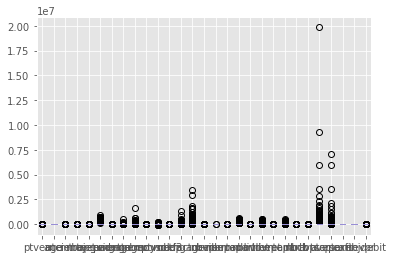

In [ ]:
VisaPremier.boxplot()

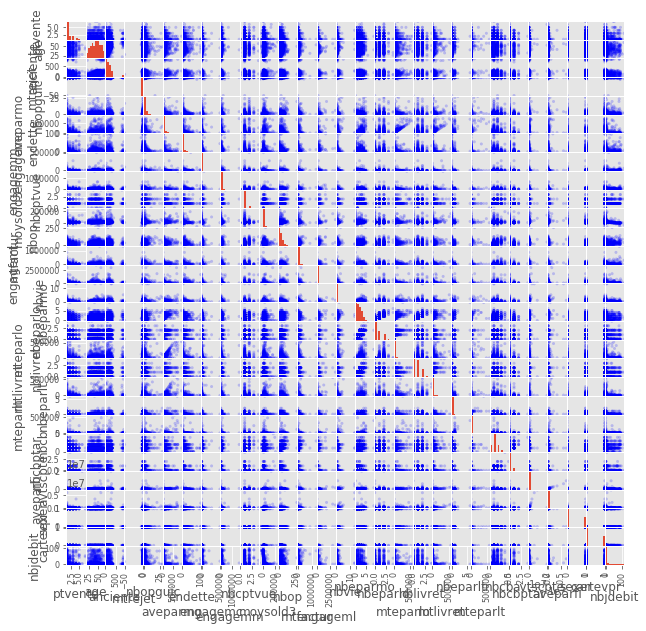

In [ ]:
scatter_matrix(VisaPremier, alpha=0.2, figsize=(10, 10), color = "blue" );

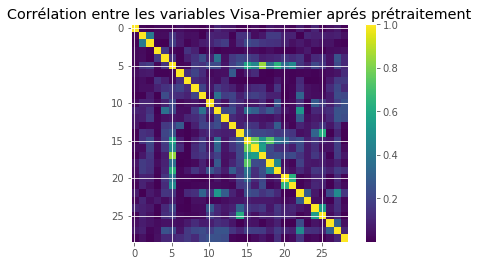

In [ ]:
# find correlated vectors
corr= np.abs(VisaPremier.corr())
# show them in an image (abs value)
plt.imshow(corr);
plt.title('Corrélation entre les variables Visa-Premier aprés prétraitement')
plt.colorbar(); plt.show()

In [ ]:
VisaPremier.columns

Index(['departem', 'ptvente', 'age', 'sitfamil', 'anciente', 'csp', 'codeqlt',
       'mtrejet', 'nbopguic', 'aveparmo', 'endette', 'engagemc', 'engagemm',
       'nbcptvue', 'moysold3', 'agemvt', 'nbop', 'mtfactur', 'engageml',
       'nbvie', 'nbeparmo', 'nbeparlo', 'mteparlo', 'nblivret', 'mtlivret',
       'nbeparlt', 'mteparlt', 'nbpaiecb', 'nbcb', 'nbcbptar', 'avtscpte',
       'aveparfi', 'sexer', 'cartevpr', 'nbjdebit'],
      dtype='object')

## scatter plot Age/anciente

Text(0, 0.5, 'Age en années')

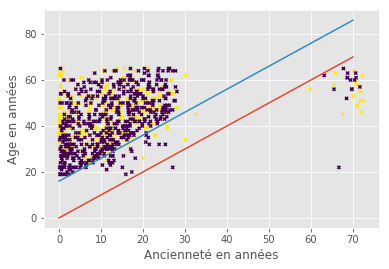

In [ ]:
plt.scatter(VisaPremier["anciente"]/12, VisaPremier["age"], c=VisaPremier["cartevpr"], s = 10, marker="x")
plt.plot([0,70], [0, 70])
plt.plot([0,70], [16, 86])
plt.xlabel("Ancienneté en années")
plt.ylabel("Age en années")

In [ ]:
VisaPremier = VisaPremier[VisaPremier["anciente"]/12 < VisaPremier["age"]] # On ne garde que les entrées qui font que age>ancienneté

## Encoding categorical data

In [ ]:
sitfamil_ohe = OneHotEncoder()
X = sitfamil_ohe.fit_transform(VisaPremier['sitfamil'].values.reshape(-1,1)).toarray()

In [ ]:
dfOneHot = pd.DataFrame(X, columns = ["sitfamil_"+str(int(i)) for i in range(X.shape[1])])


In [ ]:
VisaPremier = VisaPremier.reset_index()

In [ ]:
VisaPremier = pd.concat([VisaPremier, dfOneHot], axis=1)

In [ ]:
departem_ohe = OneHotEncoder()
X = departem_ohe.fit_transform(VisaPremier['departem'].values.reshape(-1,1)).toarray()

In [ ]:
dfOneHot = pd.DataFrame(X, columns = ["departem"+str(int(i)) for i in range(X.shape[1])])
VisaPremier = pd.concat([VisaPremier, dfOneHot], axis=1)

In [ ]:
ptvente_ohe = OneHotEncoder()
X = ptvente_ohe.fit_transform(VisaPremier['ptvente'].values.reshape(-1,1)).toarray()

In [ ]:
dfOneHot = pd.DataFrame(X, columns = ["ptvente"+str(int(i)) for i in range(X.shape[1])])
VisaPremier = pd.concat([VisaPremier, dfOneHot], axis=1)

In [ ]:
VisaPremier['codeqlt'].unique()

array(['A', 'C', 'B', 'D', 'E'], dtype=object)

In [ ]:
le = preprocessing.LabelEncoder()
VisaPremier['codeqlt'] = le.fit_transform(VisaPremier['codeqlt'].astype(str))

In [ ]:
VisaPremier['csp'].unique()

array(['Pcad', 'Psan', 'Pemp', 'Pouv', 'Part', 'Pret', 'Pagri', 'Pinc'],
      dtype=object)

In [ ]:
csp_ohe = OneHotEncoder()
X = csp_ohe.fit_transform(VisaPremier['csp'].values.reshape(-1,1)).toarray()

In [ ]:
dfOneHot = pd.DataFrame(X, columns = ["csp_"+str(int(i)) for i in range(X.shape[1])])
VisaPremier = pd.concat([VisaPremier, dfOneHot], axis=1)

In [ ]:
#Delete columns before encoding
cols_remove = ['sitfamil','csp','departem','ptvente']
VisaPremier = VisaPremier.drop(columns=cols_remove)

In [ ]:
VisaPremier.isna().sum()

index       0
age         0
anciente    0
codeqlt     0
mtrejet     0
           ..
csp_3       0
csp_4       0
csp_5       0
csp_6       0
csp_7       0
Length: 86, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 999)

## Imputing missing values using Imputer

In [ ]:
# To reset the indices  
VisaPremier = VisaPremier.reset_index(drop = True)

In [ ]:
VisaPremier['nbpaiecb'] = pd.to_numeric(VisaPremier['nbpaiecb'])

In [ ]:
VisaPremier['nbpaiecb'] = VisaPremier['nbpaiecb'].fillna(VisaPremier['nbpaiecb'].mean())

In [ ]:
label = VisaPremier["cartevpr"]

In [ ]:
VisaPremier.shape

(865, 86)

In [ ]:
label.value_counts()

0    561
1    304
Name: cartevpr, dtype: int64

## Split

In [ ]:
VisaPremier.columns

Index(['index', 'age', 'anciente', 'codeqlt', 'mtrejet', 'nbopguic',
       'aveparmo', 'endette', 'engagemc', 'engagemm', 'nbcptvue', 'moysold3',
       'agemvt', 'nbop', 'mtfactur', 'engageml', 'nbvie', 'nbeparmo',
       'nbeparlo', 'mteparlo', 'nblivret', 'mtlivret', 'nbeparlt', 'mteparlt',
       'nbpaiecb', 'nbcb', 'nbcbptar', 'avtscpte', 'aveparfi', 'sexer',
       'cartevpr', 'nbjdebit', 'sitfamil_0', 'sitfamil_1', 'sitfamil_2',
       'sitfamil_3', 'sitfamil_4', 'sitfamil_5', 'departem0', 'departem1',
       'departem2', 'departem3', 'departem4', 'departem5', 'departem6',
       'departem7', 'departem8', 'departem9', 'departem10', 'departem11',
       'departem12', 'departem13', 'departem14', 'departem15', 'departem16',
       'departem17', 'departem18', 'departem19', 'departem20', 'departem21',
       'departem22', 'departem23', 'departem24', 'departem25', 'departem26',
       'departem27', 'departem28', 'departem29', 'departem30', 'departem31',
       'departem32', 'ptvente0

In [ ]:
VisaPremier = VisaPremier.drop(columns=["index"])

In [ ]:
Data=VisaPremier.drop(columns=['cartevpr'])

In [ ]:
#Data = VisaPremier.iloc[:,0:86].values
labels = label.values
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.30, random_state=0)

## Normalisation

In [ ]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.fit_transform(X_test)  

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Cross validation 

In [ ]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel='linear',probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability = True)))
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.707039 (0.066612)
LDA: 0.659439 (0.074507)
QDA: 0.494013 (0.068224)
KNN: 0.587224 (0.090880)
CART: 0.807315 (0.049404)
RF: 0.857696 (0.052475)
NB: 0.501283 (0.064627)
SVM_LIN: 0.736214 (0.080305)
SVM_POLY: 0.309551 (0.125349)
SVM_RBF: 0.690415 (0.087801)


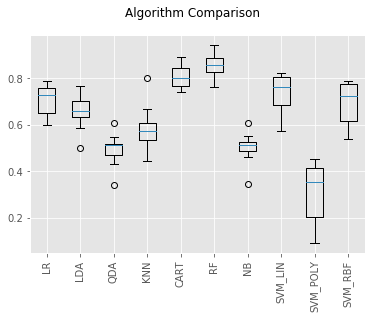

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

In [ ]:
for name, model in models:
	model.fit(X_train, y_train)

| LR | 84.23 | 0.8214 | 0.8459 |
| LDA | 83.46 | 0.8091 | 0.8230 |
| QDA | 55.38 | 0.5251 | 0.5097 |
| KNN | 76.54 | 0.7083 | 0.6909 |
| CART | 83.08 | 0.8225 | 0.8150 |
| RF | 90.38 | 0.8923 | 0.9358 |
| NB | 65.00 | 0.4042 | 0.6804 |
| SVM_LIN | 81.54 | 0.7961 | 0.8388 |
| SVM_POLY | 69.62 | 0.5590 | 0.6811 |
| SVM_RBF | 82.31 | 0.7924 | 0.8217 |


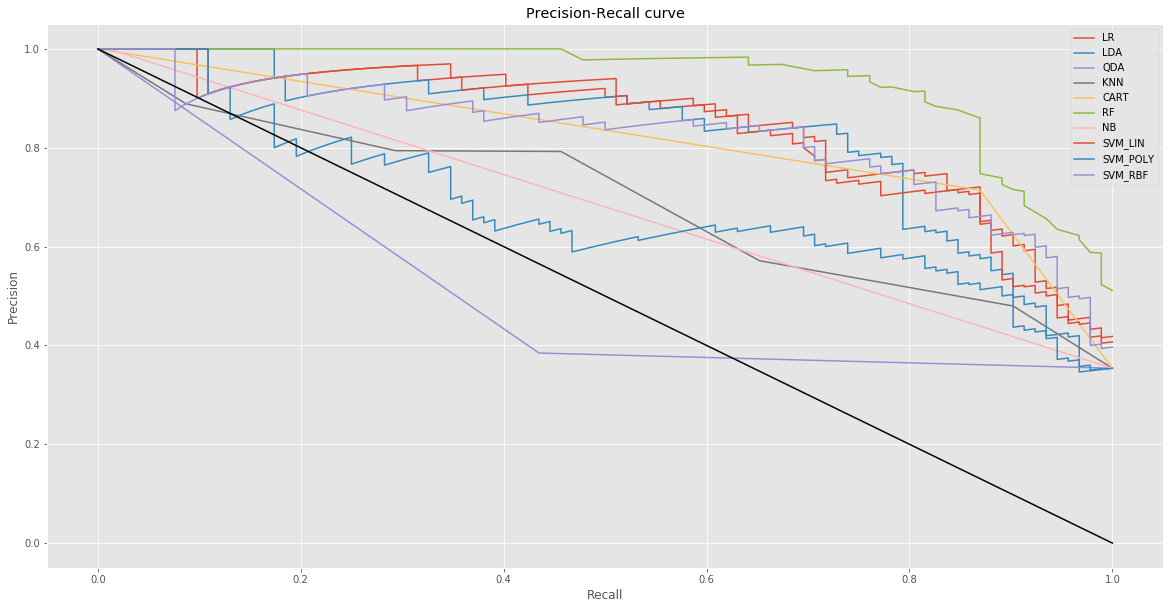

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
for name, model in models:
    pred_prob = model.predict_proba(X_test)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).sum()/len(X_test) * 100
    fscore = f1_score(y_test, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])

    print("| {} | {:.2f} | {:.4F} | {:.4f} |".format (name, accuracy, fscore, auc(recall, precision)))
    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0], color="black")
plt.title("Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

# Meilleur des Modèles et Score d'Appétence
Le meilleur modèle est le Random Forest (6e modèle)
Nous définissons un score d'appétence sur 10 retourné par la fonction `get_score_appetence`

In [ ]:
clf = models[5][1]

In [ ]:
def get_score_appetence(model, individu):
    return int(model.predict_proba(np.array([individu]))[0][1]*10)

In [ ]:
get_score_appetence(clf, X_test[0,:])

4

Les données dont le modèle a besoin sont donc : 

In [ ]:
Data.columns

Index(['age', 'anciente', 'codeqlt', 'mtrejet', 'nbopguic', 'aveparmo',
       'endette', 'engagemc', 'engagemm', 'nbcptvue', 'moysold3', 'agemvt',
       'nbop', 'mtfactur', 'engageml', 'nbvie', 'nbeparmo', 'nbeparlo',
       'mteparlo', 'nblivret', 'mtlivret', 'nbeparlt', 'mteparlt', 'nbpaiecb',
       'nbcb', 'nbcbptar', 'avtscpte', 'aveparfi', 'sexer', 'nbjdebit',
       'sitfamil_0', 'sitfamil_1', 'sitfamil_2', 'sitfamil_3', 'sitfamil_4',
       'sitfamil_5', 'departem0', 'departem1', 'departem2', 'departem3',
       'departem4', 'departem5', 'departem6', 'departem7', 'departem8',
       'departem9', 'departem10', 'departem11', 'departem12', 'departem13',
       'departem14', 'departem15', 'departem16', 'departem17', 'departem18',
       'departem19', 'departem20', 'departem21', 'departem22', 'departem23',
       'departem24', 'departem25', 'departem26', 'departem27', 'departem28',
       'departem29', 'departem30', 'departem31', 'departem32', 'ptvente0',
       'ptvente1', 'ptven

On aggrègera les variables one hot encoded ensemble en une seule, puisque celles-ci pourront être générées à partir de celle-ci.